In [1]:
%pylab inline
%matplotlib inline
import pandas as pd

df=pd.read_pickle('data/paths.pkl.xz')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_by_obj = df.set_index(['filename', 'obj']).sort_index()
df_by_obj.head(5)

frame    x    y      size  seq  \
filename                        obj                                   
-16\20170820143029_100.h264.txt 22   11103  411   65   8854504   10   
.h264.txt                       4     4512  457   50  47016176    6   
                                13   11167  399   94  38964256  168   
0.h264.txt                      39    9911  198  176  90846208   14   
0003141_100.h264.txt            6     3283  399   77   8523664  169   

                                                   time  areas  
filename                        obj                             
-16\20170820143029_100.h264.txt 22  2017-08-20 14:31:09   16.0  
.h264.txt                       4   2017-08-20 16:51:53   17.0  
                                13  2017-08-23 10:46:30   26.0  
0.h264.txt                      39  2017-08-24 08:52:55   43.0  
0003141_100.h264.txt            6   2017-08-20 00:33:52   26.0

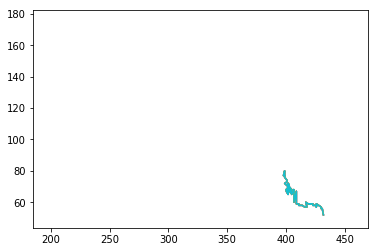

In [3]:
data_a=df_by_obj[(df_by_obj.x.between(411,460))&df_by_obj.y.between(49,100)]
top10=df_by_obj.head(10)

for t in top10.index:
    oo = df_by_obj.loc[t]
    plot(oo.x, oo.y, label="")


In [4]:
def draw_path(to_draw):
   img=imread("paths0.png")
   imshow(img)
   df_by_obj = df.set_index(['filename', 'obj']).sort_index()
   for t in to_draw.index:
       oo = df_by_obj.loc[t]
       plot(oo.x, oo.y)

In [5]:
def filter_by_area(x0,x1,y0,y1):
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    data_a=df_by_obj[(df_by_obj.x.between(x0,x1)) & (df_by_obj.y.between(y0,y1))]
    print(len(data_a))
    draw_path(data_a)
    

31011


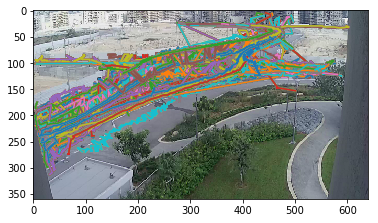

In [6]:
filter_by_area(411,450,50,60)

In [7]:
# def filter_by_aresdgdas(areas):
#     len_areas=len(areas)
#     df_by_obj = df.set_index(['filename', 'obj']).sort_index()
#     filter_con=f"(df_by_obj.x.between({areas[0][0]},{areas[0][1]})) & (df_by_obj.y.between({areas[0][2]},{areas[0][3]}))"

#     for i in range(1, len_areas):    
#         filter_con += f"|(df_by_obj.x.between({areas[i][0]},{areas[i][1]})) & (df_by_obj.y.between({areas[i][2]},{areas[i][3]}))"

#     if len_areas > 1:
#         filter_con = f"({filter_con}"
#         filter_con += ")"
#     data_a=df_by_obj[filter_con]
#     draw_path(data_a)
    

Wall time: 7.81 s


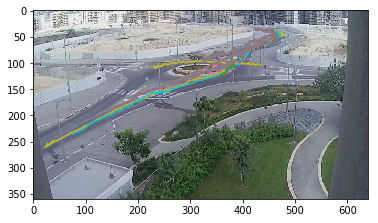

In [8]:
%%time
def filter_by_areas(areas):
    df_by_obj = df.set_index(['filename', 'obj']).sort_index().head(8000)
    data_as=df_by_obj[df_by_obj.areas.isin(areas)]
    draw_path(data_as)
filter_by_areas([1,2,3,4,5,20,25,85])    

In [9]:
# x_squares, y_squares = 5 , 2
# img=imread("paths0.png")
# h, w = img.shape[:2]
# w_delta,h_delta=w/x_squares,h/y_squares
# ab='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# areas_dict={}

# for y in range(y_squares):
#     for x in range(x_squares):
#         areas_dict[ab[x + y*x_squares]]={'x':(x*w_delta,x*w_delta + w_delta),'y':(y*h_delta,y*h_delta+h_delta)}
# areas_dict




In [10]:
df_by_obj = df.set_index(['filename', 'obj']).sort_index().head(8000)
data_as=df_by_obj[df_by_obj.areas.isin([1,2,3,4,5,20,25,85])]
data_as

frame    x    y      size  seq  \
filename                          obj                                   
0041952_100.h264.txt              7     6483  350   84  90588480  194   
                                  7     6484  350   84  90588480  194   
                                  7     6485  350   84  90588480  194   
                                  7     6486  350   84  90588480  194   
                                  7     6487  350   84  90588480  194   
                                  7     6488  350   84  90588480  194   
                                  7     6489  350   84  90588480  194   
                                  7     6490  350   84  90588480  194   
                                  7     6491  350   84  90588480  194   
                                  7     6492  350   84  90588480  194   
                                  7     6493  350   84  90588480  194   
                                  7     6494  350   84  90588480  194   
                                  7     6495  350   84  90588480  194   
                                  7     6496  350   84  90588480  194   
                                  7     6497  350   84  90588480  194   
                                  7     6498  350   84  90588480  194   
                                  7     6499  350   84  90588480  194   
                                  7     6500  350   84  90588480  194   
                                  7     6501  350   84  90588480  194   
                                  7     6502  350   84  90588480  194   
                                  7     6503  350   84  90588480  194   
                                  7     6504  350   84  90588480  194   
                                  7     6505  350   84  90588480  194   
                                  7     6506  350   84  90588480  194   
                                  7     6507  350   84  90588480  194   
                                  7     6508  350   84  90588480  194   
                                  7     6509  350   84  90588480  194   
                                  7     6510  350   84  90588480  194   
                                  7     6511  350   84  90588480  194   
                                  7     6512  350   84  90588480  194   
...                                      ...  ...  ...       ...  ...   
14-16\20170817012709_100.h264.txt 37   12868  378   90       362   16   
                                  37   12869  378   90       362   16   
                                  37   12870  378   90       362   16   
                                  37   12871  378   90       362   16   
                                  37   12873  378   90       362   16   
                                  37   12874  378   90       362   16   
                                  37   12875  378   90       362   16   
                                  37   12876  378   90       362   16   
                                  37   12877  378   90       362   16   
                                  37   12880  378   90       362   16   
                                  37   12881  378   90       362   16   
                                  37   12884  378   90       362   16   
                                  37   12885  378   90       362   16   
                                  37   12889  378   90       362   16   
                                  37   12892  378   90       362   16   
                                  49   14857  377  101       362   92   
                                  49   14858  378  100       362   93   
                                  49   14859  379   99       362   94   
                                  49   14860  381  101       362   95   
                                  49   14861  382   98       362   96   
                                  49   14862  383   96       362   97   
                                  49   14845  359  106       362   78   
                        